In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import langevin
from scipy.stats import pearsonr

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

SEED = 35010732 # from random.org
np.random.seed(SEED)

print(plt.style.available)
plt.style.use('seaborn-white')

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


In [2]:
def correlated_ts(c,delta_t = 0.1,N=1000):
    # parameters for coupled oscillator
    K,D = 1.0,1.0
    data1 = langevin.time_series(A=1/K, D=D, delta_t=delta_t, N=N)
    data2 = langevin.time_series(A=1/(K+np.abs(c)), D=D, delta_t=delta_t, N=N)
    x1 = (data1 + data2)/2
    if c>0:
        x2 = (data1 - data2)/2
    else:
        x2 = (data2-data1)/2

    return x1,x2

def c_rho(rho):
    return 2*np.abs(rho)/(1-np.abs(rho))*np.sign(rho)


In [39]:
pearson_list = []
M = 300
N = int(28/0.8)
print(N)
delta_t = 0.3
rho = 0.3
for i in range(M):
    x1,x2 = correlated_ts(c_rho(rho),delta_t=delta_t,N=M)
    pearson_list.append(pearsonr(x1,x2)[0])
pearson_list = np.array(pearson_list)

35


(array([0.20948859, 0.34914764, 0.9776134 , 1.88539727, 3.700965  ,
        5.1673851 , 3.98028312, 2.44403349, 1.74573821, 0.4888067 ]),
 array([0.02145163, 0.06918693, 0.11692223, 0.16465753, 0.21239282,
        0.26012812, 0.30786342, 0.35559872, 0.40333402, 0.45106931,
        0.49880461]),
 <a list of 10 Patch objects>)

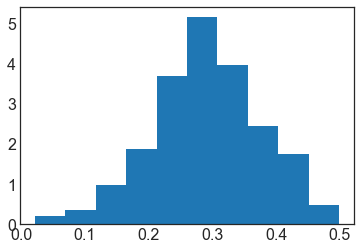

In [40]:
plt.hist(pearson_list,density=True)

In [41]:
print(pearson_list.mean(),pearson_list.std())

0.289718385691672 0.08517621264375892


In [42]:
pearson_list2 = []
M = 300
N = int(28/0.8)
delta_t = 0.1
rho = 0.3
for i in range(M):
    x1,x2 = correlated_ts(c_rho(rho),delta_t=delta_t,N=M)
    pearson_list2.append(pearsonr(x1,x2)[0])
pearson_list2 = np.array(pearson_list2)

(array([0.07645035, 0.19112588, 0.42047695, 1.72013296, 2.06415955,
        2.75221273, 2.10238473, 1.64368261, 0.38225177, 0.11467553]),
 array([-0.19648612, -0.10928356, -0.022081  ,  0.06512156,  0.15232412,
         0.23952668,  0.32672925,  0.41393181,  0.50113437,  0.58833693,
         0.67553949]),
 <a list of 10 Patch objects>)

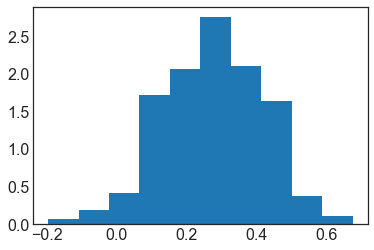

In [43]:
plt.hist(pearson_list2,density=True)

In [44]:
print(pearson_list2.mean(),pearson_list2.std())

0.2770202408910238 0.14330572793523588
